<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [3]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [4]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

df = pd.read_csv('./job_listings.csv')
                


In [8]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [5]:
df['description'] = [BeautifulSoup(text).get_text() for text in df['description'] ]

In [6]:
df.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


In [30]:
def clean(text):
    return re.sub(r'[^a-zA-Z ^0-9]', '', text)

In [31]:
df['description'] = df['description'].apply(clean)

In [32]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,ob RequirementsnConceptual understanding in Ma...,Data scientist,"[job, RequirementsnConceptual, understanding, ..."
1,1,ob DescriptionnnAs a Data Scientist 1 you will...,Data Scientist I,"[job, DescriptionnnAs, Data, scientist, 1, hel..."
2,2,s a Data Scientist you will be working on cons...,Data Scientist - Entry Level,"[Data, scientist, work, consult, business, res..."
3,3,969 6756 a monthContractUnder the general sup...,Data Scientist,"[4969, , 6756, monthcontractunder, general, su..."
4,4,ocation USA xe2x80x93 multiple locationsn2 yea...,Data Scientist,"[location, USA, xe2x80x93, multiple, locations..."


In [33]:
df['description'] = df['description'].str[1:]

In [34]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,b RequirementsnConceptual understanding in Mac...,Data scientist,"[job, RequirementsnConceptual, understanding, ..."
1,1,b DescriptionnnAs a Data Scientist 1 you will ...,Data Scientist I,"[job, DescriptionnnAs, Data, scientist, 1, hel..."
2,2,a Data Scientist you will be working on consu...,Data Scientist - Entry Level,"[Data, scientist, work, consult, business, res..."
3,3,69 6756 a monthContractUnder the general supe...,Data Scientist,"[4969, , 6756, monthcontractunder, general, su..."
4,4,cation USA xe2x80x93 multiple locationsn2 year...,Data Scientist,"[location, USA, xe2x80x93, multiple, locations..."


## 2) Use Spacy to tokenize the listings 

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [58]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# The Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Make the tokens
tokens = []
for txt in tokenizer.pipe(df['description'], batch_size=500):
    txt_tokens = [token.text for token in txt]
    tokens.append(txt_tokens)
df['tokens'] = tokens

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

vect.fit(df['description'])

dtm = vect.transform(df['description'])

dtm.todense()

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [54]:
dtm

,000,0000,02,02115njob,030nnmicrosoft,031819,032519,041819,06366,10,...,zeus,zf,zfxe2x80x99s,zheng,zillow,zillows,zonesnability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [50]:
def count(data, n=None):
    """
    List the top n words in a vocabulary
    """
    vect = CountVectorizer(stop_words='english')
    vect.fit(data)
    dtm = vect.transform(data)
    sum_words = dtm.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

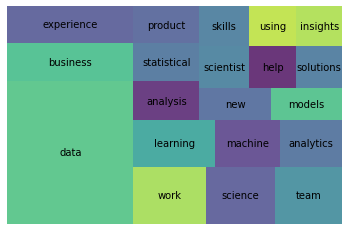

In [55]:
import squarify
import matplotlib.pyplot as plt

top20_words = pd.DataFrame(count(df['description'], n=20), columns=['word', 'count'])

squarify.plot(sizes=top20_words['count'], label=top20_words['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [56]:
import spacy
nlp = spacy.load("en_core_web_lg")

def tokenize(text):
    txt = nlp(text)
    return [token.lemma_.strip() for token in txt if (token.is_stop != True) and (token.is_punct != True)]

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.75, min_df=0.003)

dtm = tfidf.fit_transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,000,0000,02,06366,10,100,1000,100000,100000125000nnthe,1001nschedulenfulltimenjob,...,younyou,youre,youve,youxe2x80x99ll,youxe2x80x99re,youxe2x80x99ve,yrs,zero,zf,zfxe2x80x99s
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [59]:
from sklearn.neighbors import NearestNeighbors

# Fit on dtm
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [60]:
ideal = ["""
You’ll synthesize large datasets and solve complex problems through the use of advanced machine learning and statistical modeling
"""]

In [61]:
# Query the ideal job
new = tfidf.transform(ideal)
nn.kneighbors(new.todense())

(array([[1.2828445 , 1.28876625, 1.28876625, 1.29149939, 1.29816569]]),
 array([[372,  52, 142,   2, 250]], dtype=int64))

In [62]:
df['description'][372]

'e vision of the Pricing and Merchandising Analytics team at Best Buy is to provide clear relevant actionable measurable and trusted intelligence to the enterprise which will be acted upon to drive growth of the global enterprise We are seeking a Data Scientist Pricing who will provide statistical and mathematical support to partners throughout the Best Buy organizationnnThis role will provide advanced statistical and mathematical support to partners throughout the Best Buy organization The ideal candidate will have a strong basis in statistical modeling techniques such as linear and logistic regression clustering time series modeling and machine learning techniques The candidate should be comfortable with variable reduction validation techniques serializing models and automationnnThe individual in this position will work with both end business clients and peers within the pricing and analytics teams The individual in this role will have the credibility and technical acumen to influenc

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 